<a href="https://colab.research.google.com/github/RaisB17/deep_learning/blob/main/UTS_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

In [97]:
df = pd.read_csv('RegresiUTSTelkom.csv')

In [98]:
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [99]:
df.describe()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,...,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000,515344.000000
mean,1998.397077,43.387113,1.289515,8.658222,1.164110,-6.553580,-9.521968,-2.391046,-1.793215,3.727868,...,15.755411,-73.461537,41.542388,37.934163,0.315750,17.669292,-26.315520,4.458653,20.035229,1.329104
std,10.931056,6.067557,51.580393,35.268505,16.322802,22.860803,12.857763,14.571853,7.963822,10.582869,...,32.099666,175.619058,122.228915,95.050718,16.161780,114.428002,173.977455,13.346567,185.558415,22.088598
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954667,-26.059848,-11.462775,-8.487507,-20.666455,-18.441005,-10.780360,-6.468390,-2.293670,...,-1.812658,-139.555737,-20.987115,-4.669655,-6.781598,-31.580617,-101.530305,-2.566137,-59.509453,-8.820248
50%,2002.000000,44.258490,8.417725,10.476235,-0.652855,-6.007770,-11.188355,-2.046625,-1.736415,3.822305,...,9.171850,-53.089115,28.790580,33.623815,0.820830,15.598520,-21.204225,3.117645,7.759910,0.053015
75%,2006.000000,47.833875,36.124030,29.764685,8.787548,7.741877,-2.388945,6.508587,2.913455,9.961865,...,26.274487,13.478793,89.661785,77.785810,8.471000,67.795110,52.389322,9.967742,86.351645,9.679540
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  float64
 19  32

In [101]:
print("Jumlah nilai kosong:", df.isnull().sum().sum())

Jumlah nilai kosong: 0


In [102]:
df.dropna(inplace=True)

In [103]:
df.duplicated().sum()

np.int64(214)

In [104]:
df.drop_duplicates(inplace=True)

In [105]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [106]:
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
print("Jumlah outlier per kolom:")
print(outliers.sum())

Jumlah outlier per kolom:
2001         29695
49.94357     10620
21.47114     14641
73.0775      15626
8.74861      22677
             ...  
-23.08793    33863
68.40795     32695
-1.82223     30390
-27.46348    39134
2.26327      39458
Length: 91, dtype: int64


In [107]:
df = df[~outliers.any(axis=1)]
print("\nJumlah outlier setelah pembersihan:")
Q1_clean = df.quantile(0.25)
Q3_clean = df.quantile(0.75)
IQR_clean = Q3_clean - Q1_clean

outliers_clean = ((df < (Q1_clean - 1.5 * IQR_clean)) | (df > (Q3_clean + 1.5 * IQR_clean)))
print(outliers_clean.sum())


Jumlah outlier setelah pembersihan:
2001         3571
49.94357     2088
21.47114     2663
73.0775      3008
8.74861      3001
             ... 
-23.08793    4360
68.40795     5096
-1.82223     5062
-27.46348    5568
2.26327      7593
Length: 91, dtype: int64


In [108]:
target = '2001'
X = df.drop(columns=target)
y = df[target]

In [109]:
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()
print(f"Numerical features: {numerical_features}")
print(f"Categorical features: {categorical_features}")

Numerical features: ['49.94357', '21.47114', '73.0775', '8.74861', '-17.40628', '-13.09905', '-25.01202', '-12.23257', '7.83089', '-2.46783', '3.32136', '-2.31521', '10.20556', '611.10913', '951.0896', '698.11428', '408.98485', '383.70912', '326.51512', '238.11327', '251.42414', '187.17351', '100.42652', '179.19498', '-8.41558', '-317.87038', '95.86266', '48.10259', '-95.66303', '-18.06215', '1.96984', '34.42438', '11.7267', '1.3679', '7.79444', '-0.36994', '-133.67852', '-83.26165', '-37.29765', '73.04667', '-37.36684', '-3.13853', '-24.21531', '-13.23066', '15.93809', '-18.60478', '82.15479', '240.5798', '-10.29407', '31.58431', '-25.38187', '-3.90772', '13.29258', '41.5506', '-7.26272', '-21.00863', '105.50848', '64.29856', '26.08481', '-44.5911', '-8.30657', '7.93706', '-10.7366', '-95.44766', '-82.03307', '-35.59194', '4.69525', '70.95626', '28.09139', '6.02015', '-37.13767', '-41.1245', '-8.40816', '7.19877', '-8.60176', '-5.90857', '-12.32437', '14.68734', '-54.32125', '40.14786

In [110]:
from sklearn.compose import ColumnTransformer
to_scale = StandardScaler()
# Jika ada fitur kategorikal gunakan OneHotEncoder dalam ColumnTransformer
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])
X_processed = preprocessor.fit_transform(X)

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [112]:
y_train

,2001
182252,1993
52461,2006
25903,1977
37722,2002
378209,1987
...,...
341219,1978
295791,2008
377700,1987
420451,2006


In [113]:
y_test

,2001
51347,1995
127308,2010
57803,1989
290300,1997
157667,2000
...,...
397326,2005
393523,2001
486860,1989
253950,2004


In [114]:
y_train.shape

(143546,)

In [116]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [117]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train.reshape(-1, 1)).ravel()
y_test = scaler_y.transform(y_test.reshape(-1, 1)).ravel()

In [118]:

early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)
# Membangun model regresi
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(1)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [119]:
model.compile(optimizer='adam', loss='mse')

In [120]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1, callbacks=[early_stop]) #callbacks=[early_stop]

Epoch 1/100
3589/3589 ━━━━━━━━━━━━━━━━━━━━ 14s 3ms/step - loss: 0.7213 - val_loss: 0.6095
Epoch 2/100
3589/3589 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.5867 - val_loss: 0.6008
Epoch 3/100
3589/3589 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.5770 - val_loss: 0.5897
Epoch 4/100
3589/3589 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.5678 - val_loss: 0.5857
Epoch 5/100
3589/3589 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.5542 - val_loss: 0.5826
Epoch 6/100
3589/3589 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step - loss: 0.5517 - val_loss: 0.5780
Epoch 7/100
3589/3589 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - loss: 0.5449 - val_loss: 0.5743
Epoch 8/100
3589/3589 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.5367 - val_loss: 0.5758
Epoch 9/100
3589/3589 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 0.5376 - val_loss: 0.5808
Epoch 10/100
3589/3589 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - loss: 0.5303 - val_loss: 0.5706
Epoch 11/100
3589/3589 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - loss: 0.5223 - val_loss: 0.5672
Epoch 12/

In [121]:
y_pred = model.predict(X_test).flatten()
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

1122/1122 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [122]:
y_pred = model.predict(X_test)

1122/1122 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [123]:
print(f"\n📊 Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R²): {r2:.2f}")


📊 Evaluation Metrics:
Mean Squared Error (MSE): 0.55
Root Mean Squared Error (RMSE): 0.74
R-squared (R²): 0.46


In [124]:
y_test.min(), y_test.max()

(np.float64(-2.9169596920885867), np.float64(1.3881927447210252))

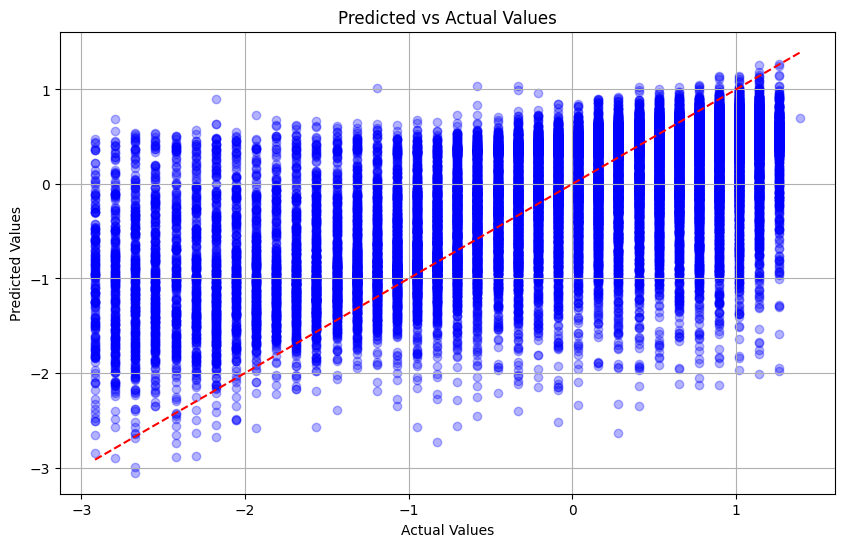

In [125]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.3, color='blue')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

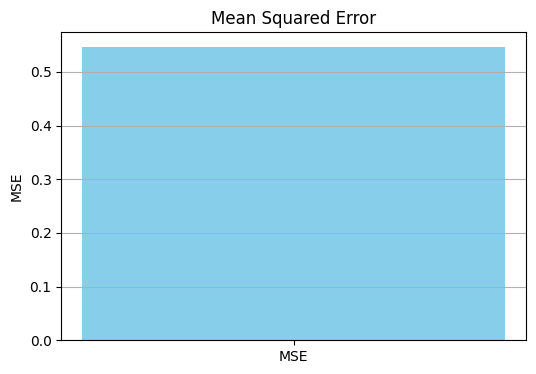

In [126]:
plt.figure(figsize=(6,4))
plt.bar(['MSE'], [mse], color='skyblue')
plt.title("Mean Squared Error")
plt.ylabel("MSE")
plt.grid(axis='y')
plt.show()

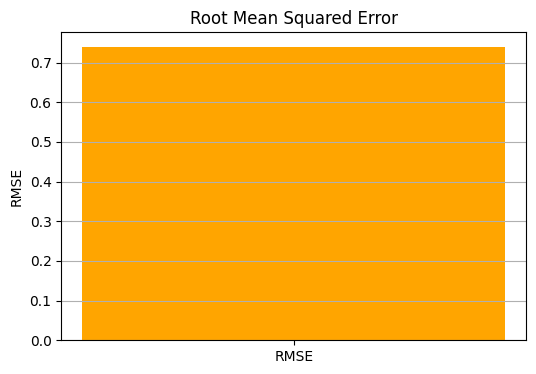

In [127]:
plt.figure(figsize=(6,4))
plt.bar(['RMSE'], [rmse], color='orange')
plt.title("Root Mean Squared Error")
plt.ylabel("RMSE")
plt.grid(axis='y')
plt.show()

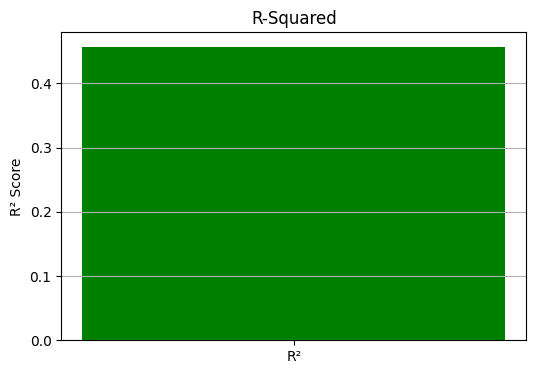

In [128]:
plt.figure(figsize=(6,4))
plt.bar(['R²'], [r2], color='green')
plt.title("R-Squared")
plt.ylabel("R² Score")
plt.grid(axis='y')
plt.show()